<a href="https://colab.research.google.com/github/Shanmukh200/Data-analysis/blob/main/SuperMarket_Sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [2]:
# Load the data
df = pd.read_csv('/content/supermarket_sales_-_Sheet1[1].csv', parse_dates=['Date'], encoding='ISO-8859-1')

# Display the first few rows of the dataframe
print(df.head())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2019-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2019-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2019-02-08   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [3]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Convert 'Date' to datetime format if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Create additional time-related features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Display the first few rows after preprocessing
print(df.head())


Missing values:
 Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  ...  \
0       Health and beauty       74.69         7  26.1

        Unit price     Quantity       Tax 5%        Total  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     55.672130     5.510000    15.379369   322.966749   
min      10.080000     1.000000     0.508500    10.678500   
25%      32.875000     3.000000     5.924875   124.422375   
50%      55.230000     5.000000    12.088000   253.848000   
75%      77.935000     8.000000    22.445250   471.350250   
max      99.960000    10.000000    49.650000  1042.650000   
std      26.494628     2.923431    11.708825   245.885335   

                             Date        cogs  gross margin percentage  \
count                        1000  1000.00000              1000.000000   
mean   2019-02-14 00:05:45.600000   307.58738                 4.761905   
min           2019-01-01 00:00:00    10.17000                 4.761905   
25%           2019-01-24 00:00:00   118.49750                 4.761905   
50%           2019-02-13 00:00:00   241.76000                 4.761905   
75%   

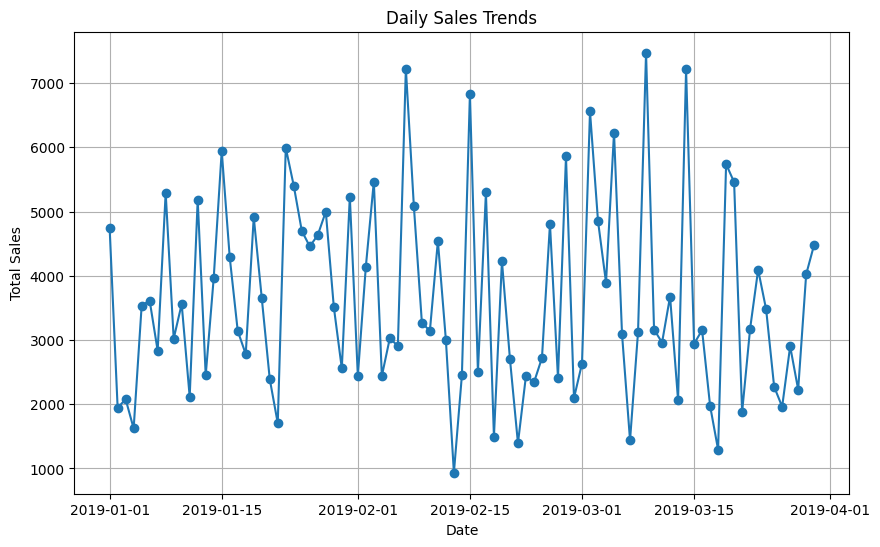

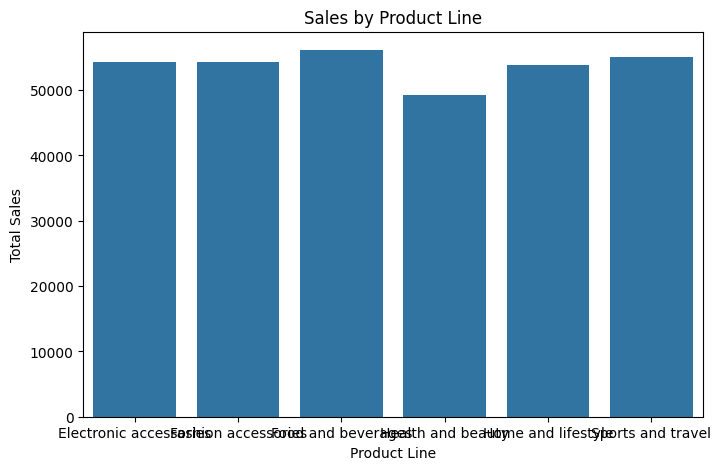

In [4]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Sales trends over time
sales_trend = df.groupby('Date')['Total'].sum().reset_index()

# Visualize sales trends
plt.figure(figsize=(10, 6))
plt.plot(sales_trend['Date'], sales_trend['Total'], marker='o')
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Sales distribution by product line
product_sales = df.groupby('Product line')['Total'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=product_sales, x='Product line', y='Total')
plt.title('Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()


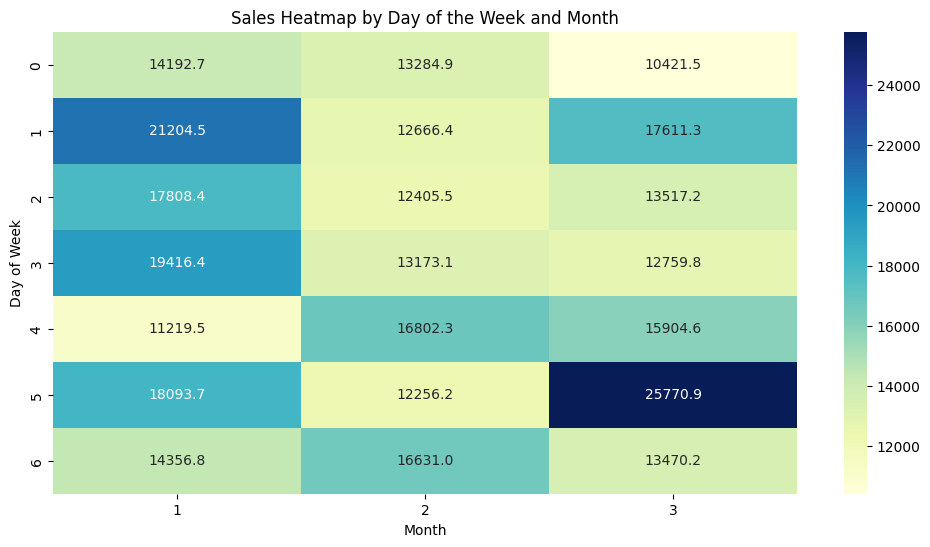

In [5]:
# Heatmap of sales by day of the week and month
sales_by_day = df.groupby(['DayOfWeek', 'Month'])['Total'].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(sales_by_day, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Sales Heatmap by Day of the Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


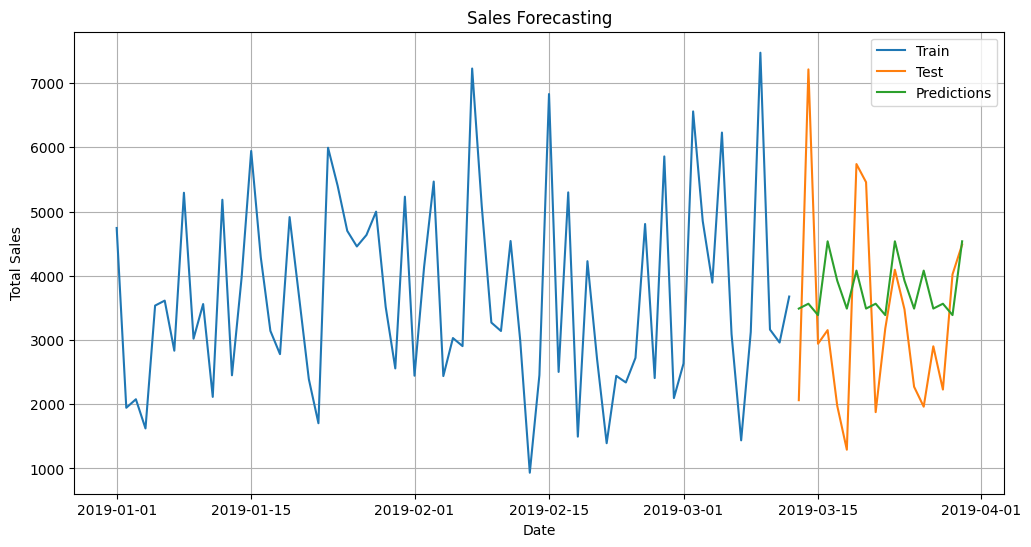

In [6]:
# Prepare data for time series forecasting
sales_time_series = df.groupby('Date')['Total'].sum().reset_index()
sales_time_series.set_index('Date', inplace=True)

# Train-Test Split
train = sales_time_series[:int(0.8*len(sales_time_series))]
test = sales_time_series[int(0.8*len(sales_time_series)):]

# Fit the model
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=7).fit()

# Predict
predictions = model.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predictions.index, predictions, label='Predictions')
plt.title('Sales Forecasting')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()
